# Lab2: Series Temporales
<h3><FONT COLOR="#FF0000"> Alumno: Flavio Olivier (Omega)</FONT></h3>

1. Levantar los datos desde el archivo dataset/demanda.csv. Los mismos fueron extraídos de los datos del informe mensual en
http://portalweb.cammesa.com/memnet1/Pages/descargas.aspx
2. Explorar los datos y visualizar descomposición de datos.
3. Modelar con Holt Winters Smoothing con diferentes parámetros.
4. Visualizar los resultados y evaluar su poder predictivo, comparando ambos modelos.

In [1]:
#paquetería...

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [2]:
#seteos...

sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline


In [3]:
#
plt.rcParams['figure.figsize'] = [15, 10]
pd.options.display.float_format = '{:.2f}'.format


## Data: CAMMESA

Compañia Administradora del Mercado Mayorista Eléctrico: demanda de energía.

In [4]:
#leemos data y parceamos por mes...

data = pd.read_csv('datasets/demanda.csv', index_col = 'TIPO', parse_dates = True, dayfirst = True)
data


,Residencial,Comercial,Industrial/Comercial Grande,TOTAL
TIPO,,,,
2013-01-01,4538446.15,3319300.73,3276372.47,11134119.35
2013-02-01,3961686.12,2820263.21,3052210.68,9834160.01
2013-03-01,3612835.11,2861328.93,3281965.27,9756129.31
2013-04-01,3239380.70,2826797.31,3241156.15,9307334.16
2013-05-01,3919669.00,2948663.28,3364493.12,10232825.39
2013-06-01,4409513.94,2873790.57,3077232.68,10360537.19
2013-07-01,5088495.11,2956731.61,3110946.67,11156173.39
2013-08-01,4782603.02,2922991.76,3198884.46,10904479.24
2013-09-01,4072686.17,2900911.23,3222275.59,10195872.99


In [5]:
#hacemos frecuencia mensual (generamos serie ts)...

ts = data['TOTAL'] # Day indexed series
data.index = data.index.to_period(freq = 'M')
data


,Residencial,Comercial,Industrial/Comercial Grande,TOTAL
TIPO,,,,
2013-01,4538446.15,3319300.73,3276372.47,11134119.35
2013-02,3961686.12,2820263.21,3052210.68,9834160.01
2013-03,3612835.11,2861328.93,3281965.27,9756129.31
2013-04,3239380.70,2826797.31,3241156.15,9307334.16
2013-05,3919669.00,2948663.28,3364493.12,10232825.39
2013-06,4409513.94,2873790.57,3077232.68,10360537.19
2013-07,5088495.11,2956731.61,3110946.67,11156173.39
2013-08,4782603.02,2922991.76,3198884.46,10904479.24
2013-09,4072686.17,2900911.23,3222275.59,10195872.99


## Análisis Exploratorio.

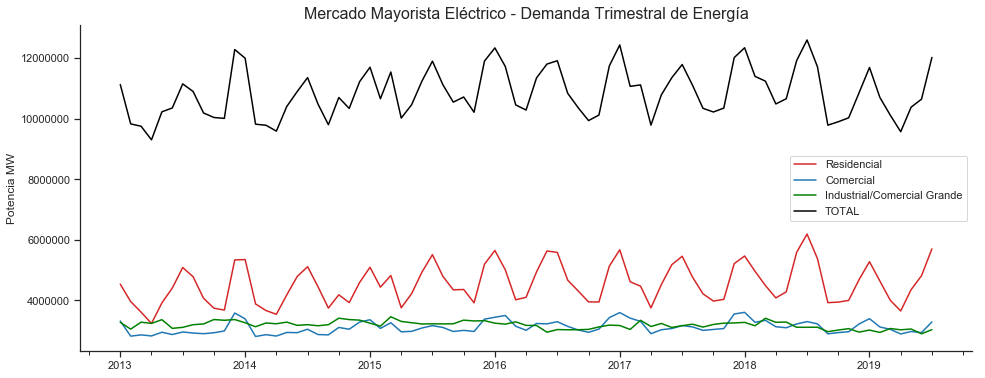

In [6]:
#ploteamos series...

fig, ax = plt.subplots(figsize = (16, 6))
plt.ticklabel_format(style = 'plain')

data['Residencial'].plot(color = red, label = 'Residencial')
data['Comercial'].plot(color = blue, label = 'Comercial')
data['Industrial/Comercial Grande'].plot(color = 'green', label = 'Industrial/Comercial Grande')
data['TOTAL'].plot(color = 'black', label = 'TOTAL')

ax.set_title('Mercado Mayorista Eléctrico - Demanda Trimestral de Energía', fontsize = 16)
ax.set_xlabel('')
ax.set_ylabel('Potencia MW')
plt.legend(loc = 'best')

sns.despine()
plt.show()


In [7]:
#side by side...
from IPython.display import display_html

def siamesas(*args):
    html_str = ''
    spaciador = '<table style="min-width: 50px !important;"><tr style="min-width: 50px !important; background:none !important;"><td style="min-width: 50px !important;"></td></tr></table>'
    for df in args:
        html_str += df.to_html() + spaciador
        
    display_html(html_str.replace('table', 'table style = "display:inline"'), raw = True)

In [8]:
#miramos un poquito...

siamesas(pd.DataFrame(data['Residencial']).describe().round(2), pd.DataFrame(data['Comercial']).describe().round(2), pd.DataFrame(data['Industrial/Comercial Grande']).describe().round(2), pd.DataFrame(data['TOTAL']).describe().round(2))


Residencial 
 
 
 
 
 count 
 79.00 
 
 
 mean 
 4551935.29 
 
 
 std 
 654164.93 
 
 
 min 
 3239380.70 
 
 
 25% 
 3990580.45 
 
 
 50% 
 4470715.12 
 
 
 75% 
 5092450.46 
 
 
 max 
 6193110.21 
 
 
 
 
 
 
 Comercial 
 
 
 
 
 count 
 79.00 
 
 
 mean 
 3113096.42 
 
 
 std 
 206829.98 
 
 
 min 
 2809183.13 
 
 
 25% 
 2948084.14 
 
 
 50% 
 3070853.24 
 
 
 75% 
 3270751.91 
 
 
 max 
 3606989.07 
 
 
 
 
 
 
 Industrial/Comercial Grande 
 
 
 
 
 count 
 79.00 
 
 
 mean 
 3187977.02 
 
 
 std 
 124659.74 
 
 
 min 
 2897618.67 
 
 
 25% 
 3109179.19 
 
 
 50% 
 3199317.20 
 
 
 75% 
 3275571.56 
 
 
 max 
 3460879.97 
 
 
 
 
 
 
 TOTAL 
 
 
 
 
 count 
 79.00 
 
 
 mean 
 10853008.74 
 
 
 std 
 816874.81 
 
 
 min 
 9307334.16 
 
 
 25% 
 10223259.40 
 
 
 50% 
 10706955.32 
 
 
 75% 
 11476364.98 
 
 
 max 
 12607552.72

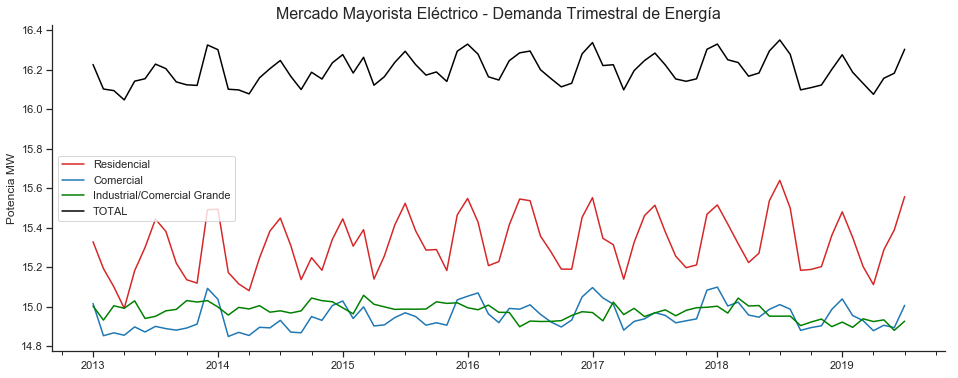

In [9]:
#ploteamos (log)series...

fig, ax = plt.subplots(figsize = (16, 6))

np.log(data['Residencial']).plot(color = red, label = 'Residencial')
np.log(data['Comercial']).plot(color = blue, label = 'Comercial')
np.log(data['Industrial/Comercial Grande']).plot(color = 'green', label = 'Industrial/Comercial Grande')
np.log(data['TOTAL']).plot(color = 'black', label = 'TOTAL')

ax.set_title('Mercado Mayorista Eléctrico - Demanda Trimestral de Energía', fontsize = 16)
ax.set_xlabel('')
ax.set_ylabel('Potencia MW')
plt.legend(loc = 'best')

sns.despine()
plt.show()


¿?... (devuelve lo mismo).

## Descomponemos TS (TOTAL).

In [10]:
#habíamos reservado en ts los valores de TOTAL...

ts


TIPO
2013-01-01   11134119.35
2013-02-01    9834160.01
2013-03-01    9756129.31
2013-04-01    9307334.16
2013-05-01   10232825.39
2013-06-01   10360537.19
2013-07-01   11156173.39
2013-08-01   10904479.24
2013-09-01   10195872.99
2013-10-01   10045715.63
2013-11-01   10015701.65
2013-12-01   12291286.49
2014-01-01   12004342.37
2014-02-01    9823968.20
2014-03-01    9789798.79
2014-04-01    9595374.35
2014-05-01   10409105.01
2014-06-01   10901714.98
2014-07-01   11363942.10
2014-08-01   10490682.39
2014-09-01    9807544.19
2014-10-01   10706493.14
2014-11-01   10344736.67
2014-12-01   11229377.82
2015-01-01   11706190.09
2015-02-01   10665086.62
2015-03-01   11548527.07
2015-04-01   10026434.76
2015-05-01   10467633.69
2015-06-01   11254419.67
                 ...    
2017-02-01   11074906.50
2017-03-01   11122231.55
2017-04-01    9793758.59
2017-05-01   10795213.41
2017-06-01   11359330.66
2017-07-01   11796425.76
2017-08-01   11107250.71
2017-09-01   10348584.55
2017-10-01   1022732

In [12]:
#descomponemos y chequeamos salidas disponibles...

decomposition = sm.tsa.x13_arima_analysis(ts, x12path = '.')
[attr for attr in dir(decomposition) if not attr.startswith('_')]


['irregular', 'observed', 'plot', 'results', 'seasadj', 'stdout', 'trend']

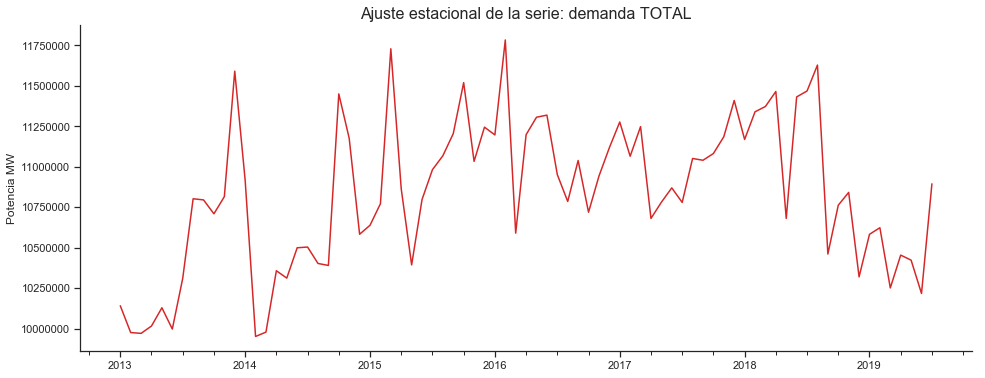

In [13]:
#ploteamos serie ajustada estacionalmente...

fig, ax = plt.subplots(figsize = (16, 6))
plt.ticklabel_format(style = 'plain')

decomposition.seasadj.plot(color = red)

ax.set_xlabel('')
ax.set_ylabel('Potencia MW')
ax.set_title('Ajuste estacional de la serie: demanda TOTAL', fontsize = 16)
#ax.set_xticks([], minor = True)

sns.despine()
plt.show()


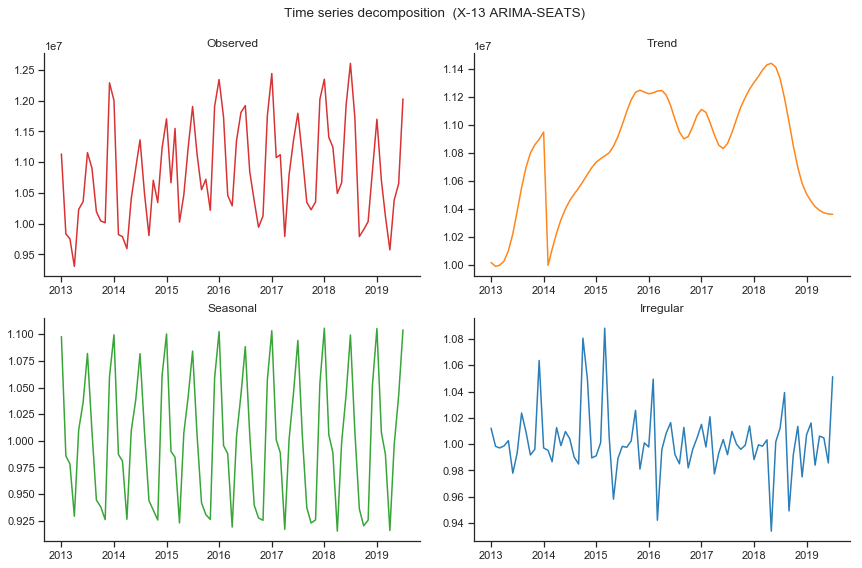

In [14]:
#descomponemos...
from plotting import plot_components_x13

plot_components_x13(decomposition)

plt.show()


In [15]:
#antes de modelar y pronosticar aplicamos un suavizado por tendencia al ajuste por estacionalidad...

z = decomposition.seasadj.copy()
z.index = ts.index.to_period(freq = 'M')

model_sm = sm.tsa.Holt(z).fit()
smoothed_sm = model_sm.fittedvalues
alpha_sm = model_sm.model.params['smoothing_level']
betha_sm = model_sm.model.params['smoothing_slope']
mse_sm = sm.tools.eval_measures.mse(ts,smoothed_sm)

print(' Smoothing parameter: alpha  {0:.3f}'.format(alpha_sm))
print(' Smoothing parameter: betha  {0:.3f}'.format(betha_sm))
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_sm))

model_sm.summary()


 Smoothing parameter: alpha  0.384
 Smoothing parameter: betha  0.000
 In-sample fit:
 MSE               608698701812.201


Dep. Variable:,endog,No. Observations:,79
Model:,Holt,SSE,11011658546791.621
Optimized:,True,AIC,2035.182
Trend:,Additive,BIC,2044.659
Seasonal:,None,AICC,2036.348
Seasonal Periods:,None,Date:,"Sun, 15 Sep 2019"
Box-Cox:,False,Time:,22:02:54
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3842037,alpha,True
smoothing_slope,0.000000,beta,True


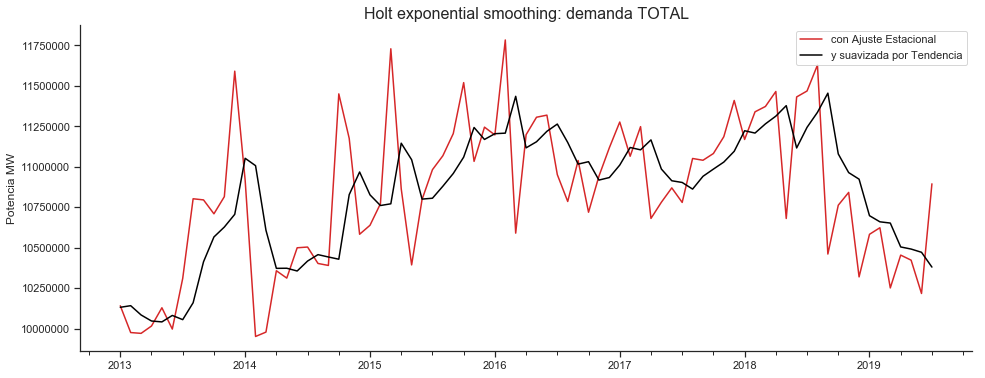

In [16]:
#ploteamos las series ajustada por estacionalidad versus la suavizada por tendencia...

fig, ax = plt.subplots(figsize = (16, 6))
plt.ticklabel_format(style = 'plain')

ax.set_title('Holt exponential smoothing: demanda TOTAL', fontsize = 16)

z.plot(color = '#D62728', label = 'con Ajuste Estacional')
smoothed_sm.plot(color = 'black', label = 'y suavizada por Tendencia')

plt.legend(loc = 'best')
ax.set_xlabel('')
ax.set_ylabel('Potencia MW')

sns.despine()
plt.show()


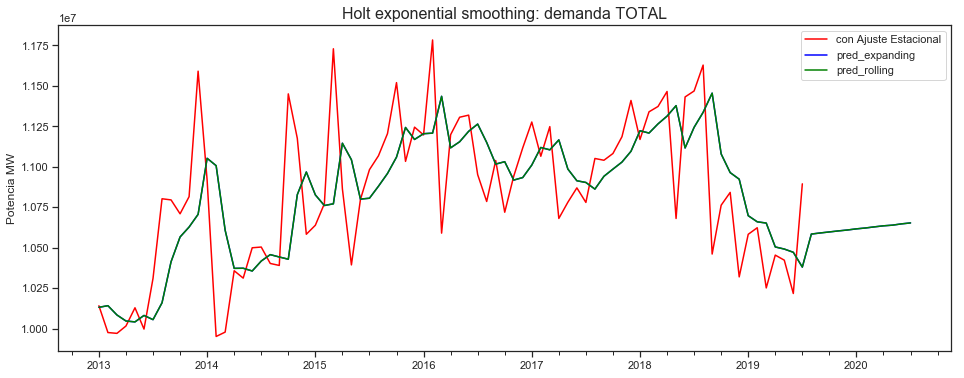

In [17]:
#predicción con rolling y expanding windows...

h = 12
w = h * 12
Z = z

model = sm.tsa.Holt
pred_index = Z.index[-1] + np.array(range(1, h + 1))
pred_rolling = pd.Series(0, index = pred_index)
pred_expanding = pd.Series(0, index = pred_index)
orig_fit = None

for i in range(0, h):
    current = pd.concat([Z, pred_expanding.head(i)])
    expanding = model(current).fit()
    if i == 0:
        orig_fit = expanding.fittedvalues
        
    rolling = model(current.tail(w)).fit()
    pred_expanding.update(expanding.forecast(1))
    pred_rolling.update(rolling.forecast(1))
    
ax = Z[-w:].plot(color = 'red', figsize = (16, 6), label = 'con Ajuste Estacional')
ax.set_title('Holt exponential smoothing: demanda TOTAL', fontsize = 16)
ax.set_xlabel('')
ax.set_ylabel('Potencia MW')

pd.concat([orig_fit[-w:], pred_expanding]).plot(ax = ax, color = 'blue', label = 'pred_expanding')
pd.concat([orig_fit[-w:], pred_rolling]).plot(ax = ax, color = 'green', label = 'pred_rolling')

plt.legend(loc = 'best')
plt.show()


## Modelamos con Holt Winters Smoothing (TOTAL).

In [18]:
#

def hw_summary(model_sm):
    rmse_sm = sm.tools.eval_measures.rmse(model_sm.data.endog,model_sm.fittedvalues)
    print(' In-sample fit:')
    print(' RMSE               {0:.3f}'.format(rmse_sm))
    return model_sm.summary()


In [19]:
#jugamos con los parámetros...

ahw_sm = sm.tsa.ExponentialSmoothing(data['TOTAL'], trend = 'add', damped = False, seasonal = 'add', seasonal_periods = 12).fit()
hw_summary(ahw_sm)


 In-sample fit:
 RMSE               471015.011


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,17526556124824.545
Optimized:,True,AIC,2095.898
Trend:,Additive,BIC,2133.809
Seasonal:,Additive,AICC,2107.298
Seasonal Periods:,12,Date:,"Sun, 15 Sep 2019"
Box-Cox:,False,Time:,22:03:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1668049,alpha,True
smoothing_slope,1.2698e-08,beta,True


In [20]:
#jugamos con los parámetros...

mhw_sm = sm.tsa.ExponentialSmoothing(data['TOTAL'], trend = 'add', damped = False, seasonal = 'mul', seasonal_periods = 12).fit()
hw_summary(mhw_sm)


 In-sample fit:
 RMSE               373386.184


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,11013962158592.178
Optimized:,True,AIC,2059.198
Trend:,Additive,BIC,2097.109
Seasonal:,Multiplicative,AICC,2070.598
Seasonal Periods:,12,Date:,"Sun, 15 Sep 2019"
Box-Cox:,False,Time:,22:03:05
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3555770,alpha,True
smoothing_slope,5.6174e-14,beta,True


In [21]:
#jugamos con los parámetros...

mhw_damped = sm.tsa.ExponentialSmoothing(data['TOTAL'], trend = 'add', damped = True, seasonal = 'mul', seasonal_periods = 12).fit()
hw_summary(mhw_damped)


 In-sample fit:
 RMSE               373992.563


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,11049764539993.861
Optimized:,True,AIC,2061.455
Trend:,Additive,BIC,2101.735
Seasonal:,Multiplicative,AICC,2074.336
Seasonal Periods:,12,Date:,"Sun, 15 Sep 2019"
Box-Cox:,False,Time:,22:03:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3601600,alpha,True
smoothing_slope,0.0526472,beta,True


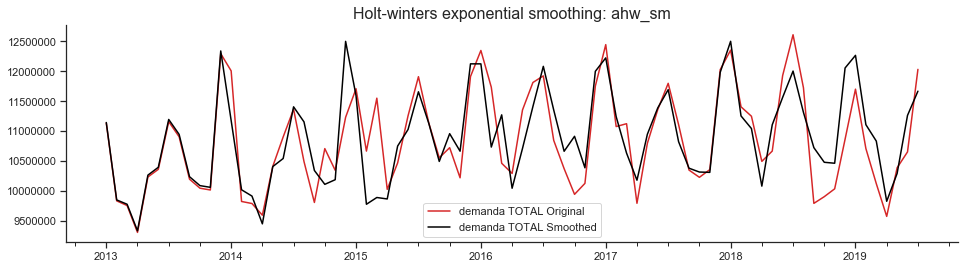

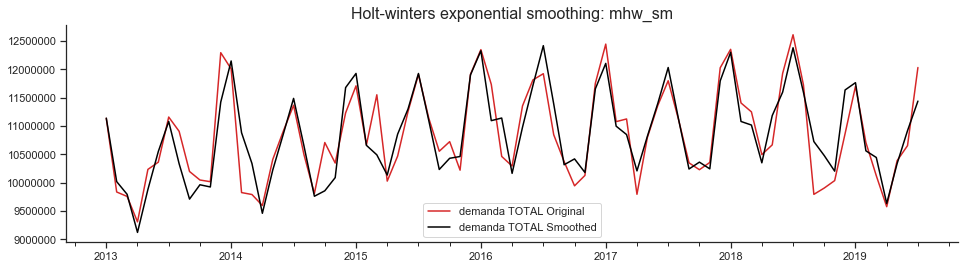

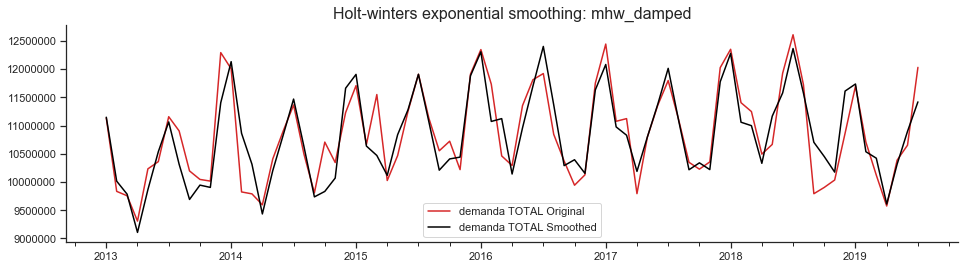

In [22]:
#

smoothed = pd.Series(ahw_sm.fittedvalues, index = data['TOTAL'].index)

fig, ax = plt.subplots(figsize = (16, 4))
plt.ticklabel_format(style = 'plain')

data['TOTAL'].plot(color = '#D62728', label = 'demanda TOTAL Original')
smoothed.plot(color = 'black', label = 'demanda TOTAL Smoothed')

plt.legend(loc = 'best')
ax.set_xlabel('')
ax.set_title('Holt-winters exponential smoothing: ahw_sm', fontsize = 16)
 
sns.despine()
plt.show()

#

smoothed = pd.Series(mhw_sm.fittedvalues, index = data['TOTAL'].index)

fig, ax = plt.subplots(figsize = (16, 4))
plt.ticklabel_format(style = 'plain')

data['TOTAL'].plot(color = '#D62728', label = 'demanda TOTAL Original')
smoothed.plot(color = 'black', label = 'demanda TOTAL Smoothed')

plt.legend(loc = 'best')
ax.set_xlabel('')
ax.set_title('Holt-winters exponential smoothing: mhw_sm', fontsize = 16)
 
sns.despine()
plt.show()

#

smoothed = pd.Series(mhw_damped.fittedvalues, index = data['TOTAL'].index)

fig, ax = plt.subplots(figsize = (16, 4))
plt.ticklabel_format(style = 'plain')

data['TOTAL'].plot(color = '#D62728', label = 'demanda TOTAL Original')
smoothed.plot(color = 'black', label = 'demanda TOTAL Smoothed')

plt.legend(loc = 'best')
ax.set_xlabel('')
ax.set_title('Holt-winters exponential smoothing: mhw_damped', fontsize = 16)
 
sns.despine()
plt.show()


El método multiplicativo (mhw_sm) parece seguir de cerca la serie original...

## Diagnóstico.

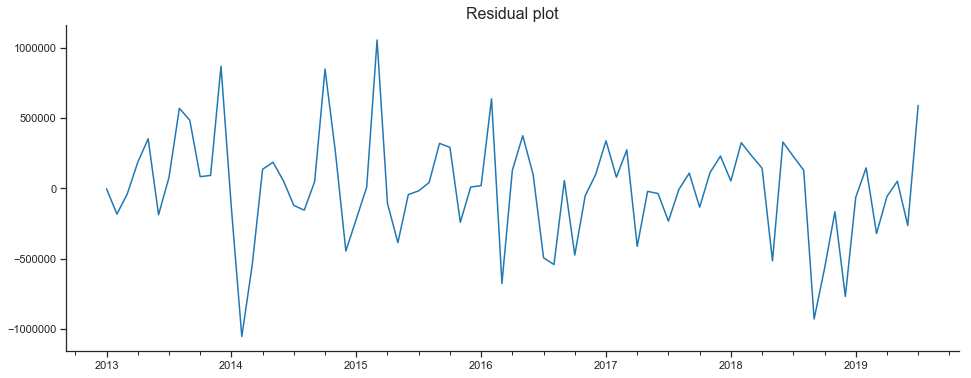

In [23]:
#diagnósticos en base al método multiplicativo (parece capturar de buen modo los patrones)...

resid = (data['TOTAL'] - mhw_sm.fittedvalues)

fig, ax = plt.subplots(figsize = (16, 6))
resid.plot(color = blue)
ax.set_xlabel('')
ax.set_title('Residual plot', fontsize = 16)

sns.despine()
plt.show()


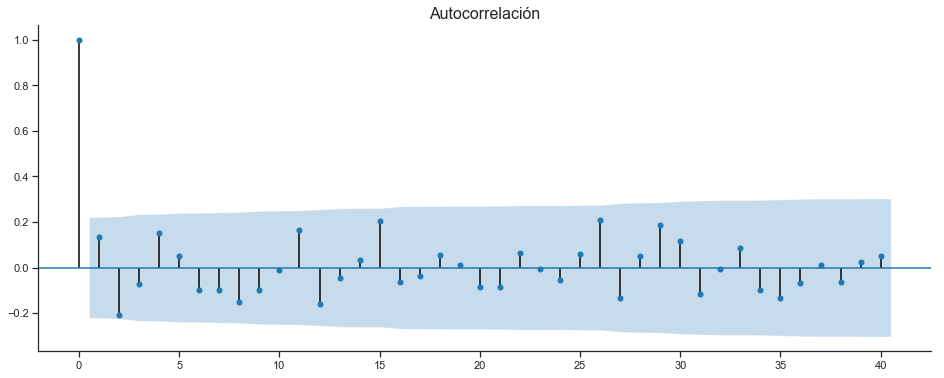

In [24]:
#Autocorrelaciones...

fig, ax = plt.subplots(figsize = (16, 6))

sm.graphics.tsa.plot_acf(resid, lags = 40, ax = ax)
ax.set_title('Autocorrelación', fontsize = 16)

sns.despine()
plt.show()

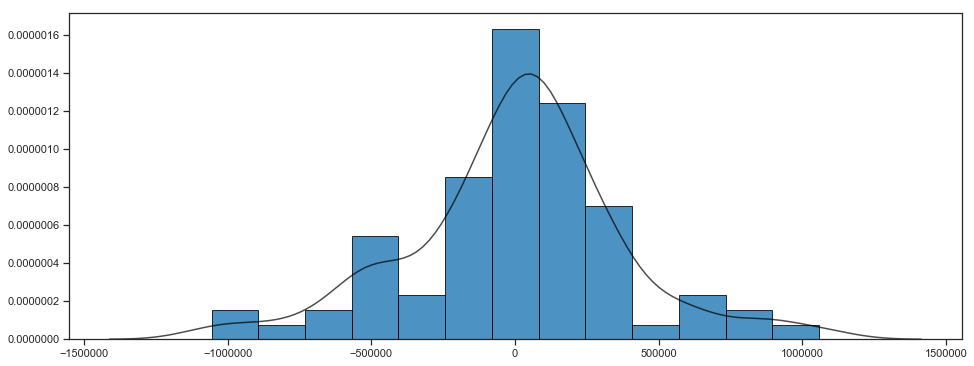

In [26]:
#histograma (distribución de residuos)...
from plotting import histogram

fig, ax = plt.subplots(figsize = (16, 6))
    
sns.distplot(resid, ax = ax, hist_kws = {'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws = {'color': 'black', 'alpha': 0.7})

plt.show()

## Validación.

In [27]:
# 

start_val = data['TOTAL'].index[-round(len(data['TOTAL']) / 12 * .2) * 12]
start_val


Period('2018-08', 'M')

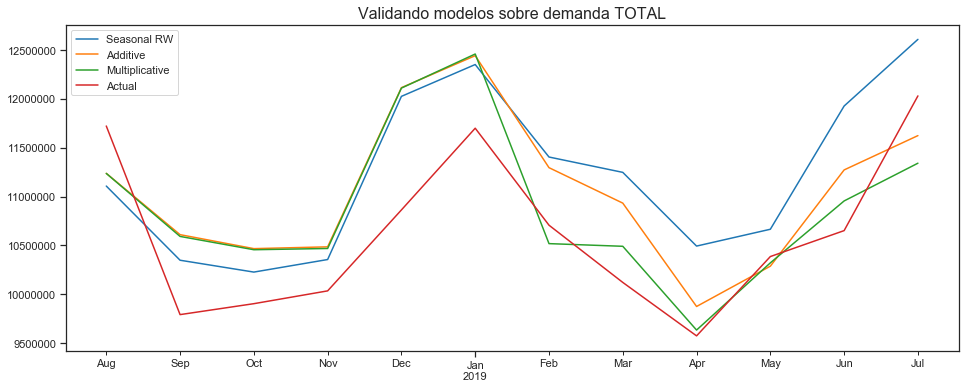

In [28]:
#comparamos métodos...

validation = data['TOTAL'][start_val:].index
start = data['TOTAL'].index.get_loc(start_val) 

pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
pred3 = [] # multiplicative holt winters
actual= []

for i in range(start, len(data['TOTAL'])):
    
    actual.append(data['TOTAL'].iloc[i])
    
    pred1.append(data['TOTAL'].iloc[i-12])
    
    model = sm.tsa.ExponentialSmoothing(data['TOTAL'].iloc[:i], trend = 'add', damped = False, seasonal = 'add', seasonal_periods = 12).fit()
    pred2.append(model.forecast(1)[0])
    
    model = sm.tsa.ExponentialSmoothing(data['TOTAL'].iloc[:i], trend = 'add', damped = False, seasonal = 'mul', seasonal_periods = 12).fit()
    pred3.append(model.forecast(1)[0])
    

columns = ['Seasonal RW', 'Additive', 'Multiplicative', 'Actual']
results = np.vstack([pred1, pred2, pred3, actual]).T
results = pd.DataFrame(results, columns = columns, index = validation)

fig, ax = plt.subplots(figsize = (16, 6))
plt.ticklabel_format(style = 'plain')

results.plot(ax = ax)
ax.set_title('Validando modelos sobre demanda TOTAL', fontsize = 16)
ax.set_xlabel('')

plt.show()


In [29]:
#¿cuál de los métodos es mas preciso?

from scipy import stats

table = pd.DataFrame(0.0, index = results.columns[:-1], columns = ['RMSE', 'SE'])
for i in range(len(results.columns)-1):
    table.iloc[i, 0] = sm.tools.eval_measures.rmse(results.iloc[:, i], results.iloc[:, -1])
    table.iloc[i, 1] = (results.iloc[:, i] - results.iloc[:, -1]).sem()
    
table


,RMSE,SE
Seasonal RW,779964.34,148054.67
Additive,657764.44,150172.34
Multiplicative,594545.13,161499.99


## Forecast

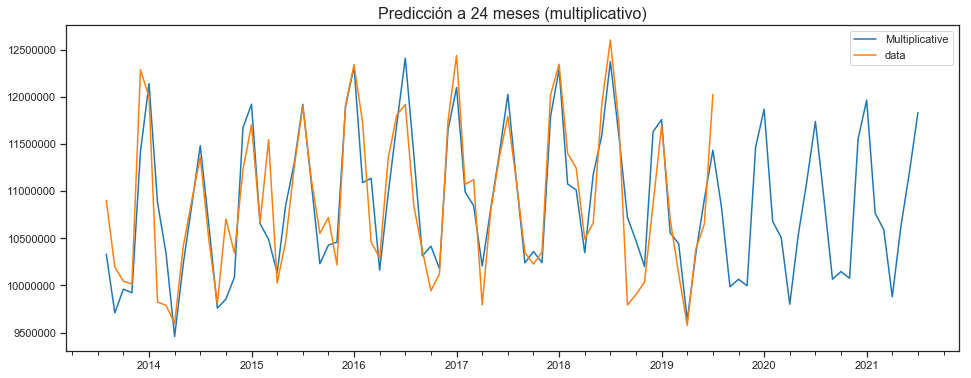

In [30]:
#predicción de 24 meses sobre el modelo seleccionado...

h = 2 * 12 #M
w = h * 3

model = sm.tsa.ExponentialSmoothing(data['TOTAL'], 
                    trend = 'add', damped = False, seasonal = 'mul', seasonal_periods = 12).fit()

plot = pd.DataFrame()
plot['Multiplicative'] = pd.concat([model.fittedvalues, model.forecast(h)])
plot['data'] = data['TOTAL']

fig, ax = plt.subplots(figsize = (16, 6))
plt.ticklabel_format(style = 'plain')

plot[-(w + h):].plot(ax = ax)
ax.set_title('Predicción a 24 meses (multiplicativo)', fontsize = 16)

plt.show()
